 <h1 align="center">by : YOUSSEF AHMED </h1> 
 <h3 align="center">Section 3 </h3>
 <h5 align="center">Using : Python 3.6 </h5>

<h3>Import</h3>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import statistics as s
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

<h1>Plot the Data Function</h1>

In [2]:
def plotData(x,y,x_label,y_label):
    plt.plot(x,y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<h1>Threshold , and Smooth signal Functions</h1>

In [3]:
def calcThreshold(data,par):
    
    data_500 = data[0:500]
    threshold = s.stdev(data_500) * par
    

    return threshold

In [4]:
def smoothSignal(data,window_size = 48):
    
    data_new = []

    for i in range(len(data)):
        y_new = 0.0
        if(i>window_size):
            for j in range(window_size+1):
                y_new += data[i-j]

            y_new /= window_size

        data_new.append(y_new)    
    
    
    return np.asarray(data_new)

<h1>Get the Peaks of the Spikes</h1>

In [5]:
def getSpikesPeaks(data,threshold):
       
    t_peaks = []
    
    flag = True
        
    for i in range(len(data)):
        
        if (data[i] > threshold):
            if(data[i+1]< data[i] and flag and i!=0):
                flag = False
                t_peaks.append(i)
                
                
                
        if (data[i] <= threshold): # finished the current spike
            flag = True
            
           
    

    return t_peaks  
    

<h1>Spikes Array and Curve</h1>

In [6]:
def getSpikes(spikes_peaks,data):
    
    spikes = np.array([])

    flag = True

    for index in spikes_peaks:
        spike = data[(index-24):(index+24)]

        if(flag):
            flag = False
            spikes = np.reshape(spikes, (0,spike.shape[0]))
        else:    
            spikes = np.vstack((spikes,spike))


    for i in spikes:
        plt.plot(i)
    
    plt.show()

    return spikes

<h1>PCA Function</h1>

In [7]:
def SpikesPCA(spikes):
    standard_spikes = StandardScaler().fit_transform(spikes)
    pca = PCA(n_components=2)
    feature_space = pca.fit_transform(spikes)
    x = feature_space[:,0]
    y = feature_space[:,1]
    plt.plot(x,y,'o')
    plt.show()
    
    return feature_space

<h1>K-means Functions</h1>
<h2>get the labels and the means</h2>

In [8]:
def get_k_means(k,X):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    x = X[:, 0] * (10**5)
    y = X[:, 1] * (10**5)
    

    return kmeans.cluster_centers_ , y_kmeans   

<h2>Plot after k-means</h2>

In [9]:
def draw_k_means(k,X):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    x = X[:, 0] * (10**5)
    y = X[:, 1] * (10**5)
    
    plt.scatter(x,y , c=y_kmeans, s=50, cmap='rainbow')
    

<h1>Mark Peaks Function</h1>
<h4>this function to draw each electrode peak labeled over the original Data </h>

In [10]:
def markPeaks(threshold,data,labels,spikes_peaks):
    
    first_20K = data[0:20000]
    plt.plot(first_20K)
    peaks_cluster1_value = []
    peaks_cluster2_value = []
    
    peaks_cluster1_time = []
    peaks_cluster2_time = []
    
    peaks = []
    
    true_labels = []
    
    for i in range(len(spikes_peaks)):
        if (spikes_peaks[i] < 20000):
            peaks.append(spikes_peaks[i])
            true_labels.append(labels[i])
            
    for i in range(len(peaks)):
        if(true_labels[i]) == 0:
            peaks_cluster1_value.append(data[peaks[i]])
            peaks_cluster1_time.append(peaks[i])
        
        elif(true_labels[i]) == 1:
            peaks_cluster2_value.append(data[peaks[i]])
            peaks_cluster2_time.append(peaks[i])
    
    plt.plot(peaks_cluster1_time,peaks_cluster1_value,'bX')
    plt.plot(peaks_cluster2_time,peaks_cluster2_value,'gX')
            
    
    
    
    plt.plot(first_20K)
    plt.axhline(y=threshold, color='r', linestyle='-')
    plt.axhline(y=-threshold, color='r', linestyle='-')
    plt.show()
    
    

<h3>Read the Data</h3>

In [11]:
elec_data = np.loadtxt("Data.txt",dtype= float)
first_elec = elec_data[:,0]
second_elec = elec_data[:,1]
n_samples =  elec_data.shape[0]
ts = float ( 1 / 24414 )
t = np.array([i*ts for i in range(n_samples)])

first_elec_abs = abs(first_elec)
second_elec_abs = abs(second_elec)

<h3>Please wait this might take a couple of minutes :D </h3>

In [12]:
first_smoothed = smoothSignal(first_elec_abs)
second_smoothed = smoothSignal(second_elec_abs)

<h4> With and Without Smoothing - Electrode 1</h4>

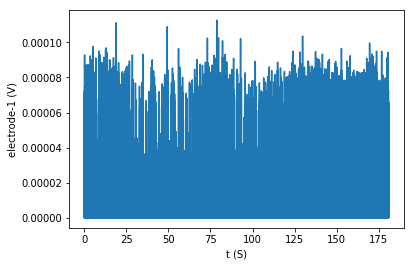

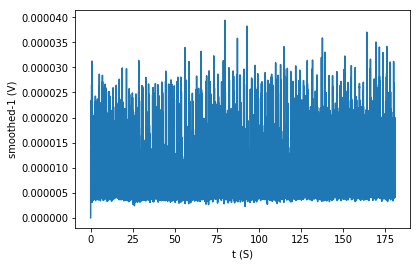

In [13]:
plotData(t,first_elec_abs,'t (S)','electrode-1 (V)' )
plotData(t,first_smoothed,'t (S)','smoothed-1 (V)')


<h4>With and Without Smoothing - Electrode 2</h4>

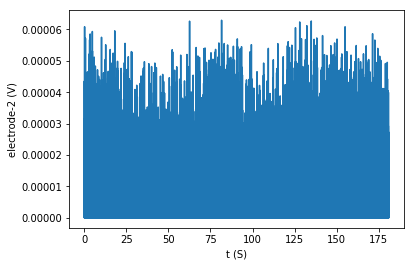

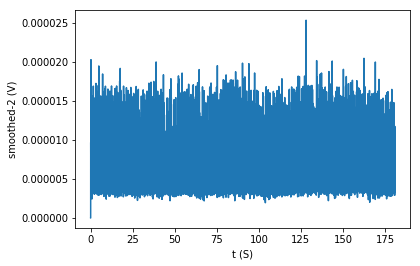

In [14]:
plotData(t,second_elec_abs,'t (S)','electrode-2 (V)' )
plotData(t,second_smoothed,'t (S)','smoothed-2 (V)')

<h3>The Following results is for electrode 1 and 3.5 * Standard Deviation Threshold</h3>

In [15]:

threshold = calcThreshold(first_elec_abs,3.5)


<h3>now let's try to apply the threshold to the smoothed electrode 1 signal</h3>

In [16]:

spikes_peaks = getSpikesPeaks(first_smoothed,threshold)

n_spikes = len(spikes_peaks)

print(n_spikes)


1886


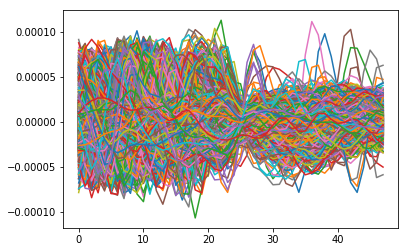

array([[ 5.1957e-05,  2.8947e-05,  1.8799e-05, ...,  3.6393e-08,
        -6.6461e-06, -1.4796e-05],
       [ 2.7784e-06,  4.8950e-06,  1.2322e-05, ...,  5.3401e-06,
         1.6290e-06, -1.1516e-06],
       [-5.2777e-06, -5.5932e-06, -3.3871e-06, ...,  1.9025e-06,
        -5.2298e-07, -5.4123e-06],
       ...,
       [ 8.2914e-06,  9.8449e-06,  1.2045e-05, ...,  4.1661e-06,
         9.9266e-06,  7.3120e-06],
       [ 9.3657e-06,  1.8013e-05,  2.3490e-05, ..., -1.1933e-05,
        -1.2583e-05, -3.0254e-06],
       [ 2.5821e-05,  1.7610e-05, -7.6137e-06, ..., -5.6387e-06,
        -7.2392e-06, -7.4274e-06]])

In [17]:
getSpikes(spikes_peaks,first_elec)


<h3>looks like the result is not good and the peaks is not aligned so now let's apply the threshold to the abs value of electrode 1 signal instead of the smoothed one </h3>

In [18]:
spikes_peaks = getSpikesPeaks(first_elec_abs,threshold)

n_spikes = len(spikes_peaks)

print(n_spikes)

132837


<h3>132k spike! very huge number and will take a long time to process, so let's try to calculate the threshold from the raw data not the abs one</h3>

In [19]:

threshold = calcThreshold(first_elec,3.5)

spikes_peaks = getSpikesPeaks(first_elec_abs,threshold)

n_spikes = len(spikes_peaks)

print(n_spikes)

11499


<h3>Please wait this might take a couple of minutes :D </h3>

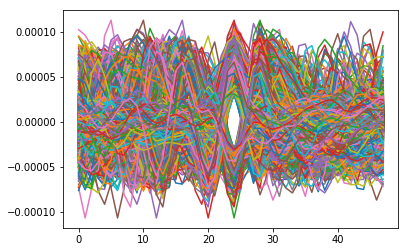

In [20]:
spikes = getSpikes(spikes_peaks,first_elec)

<h3>Now the PCA part</h3>

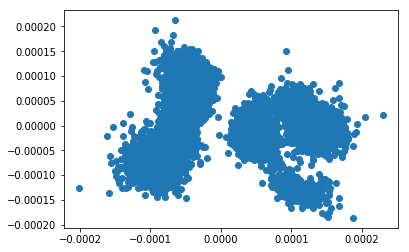

In [21]:
feature_space = SpikesPCA(spikes)

 <h1 align="center">"FeatureSpace_1_3_5.jpg"</h1> 

<h3>K-means Part let's first try k = 3 </h3>

(11498, 2)


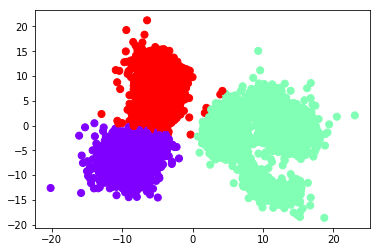

In [22]:

print(np.shape(feature_space))

draw_k_means(3,feature_space)

<h3> k = 2 </h3>

(11498, 2)


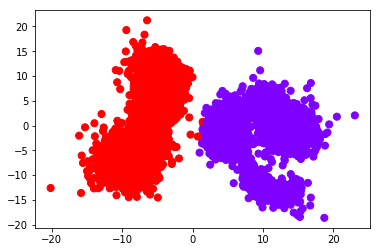

In [23]:
print(np.shape(feature_space))

draw_k_means(2,feature_space)

<h4>much better so we will asume K = 2 for electrode 1 , i.e 2 Neurons</h4>

 <h1 align="center">"Neurons_1_3_5.txt"</h1> 


<h3>Spikes on data part</h3>

In [24]:
Templates,labels = get_k_means(2,spikes)

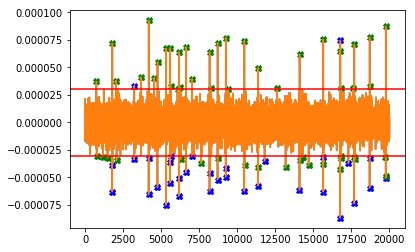

In [25]:
markPeaks(threshold,first_elec,labels,spikes_peaks)

 <h1 align="center">"DetectedSpikes_1_3_5.jpg"</h1> 

<h3>Template part</h3>

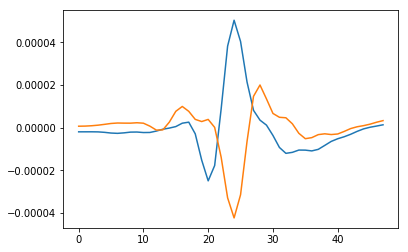

In [26]:
for i in Templates:
    plt.plot(i)
    
plt.show()

 <h1 align="center">"Templates_1_3_5.jpg"</h1> 

<h1>-----------End of Part 1/4-----------</h1>

<h3>The Following results is for electrode 1 and 5 * Standard Deviation Threshold</h3>

In [27]:

threshold = calcThreshold(first_elec,5)

spikes_peaks = getSpikesPeaks(first_elec_abs,threshold)

n_spikes = len(spikes_peaks)

print(n_spikes)

4893


<h3>Please wait this might take a couple of minutes :D </h3>

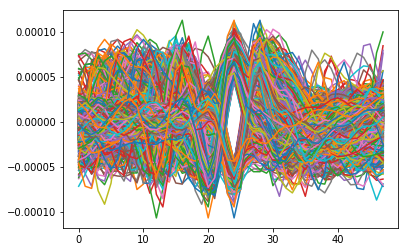

In [28]:
spikes = getSpikes(spikes_peaks,first_elec)

<h3>Now the PCA part</h3>

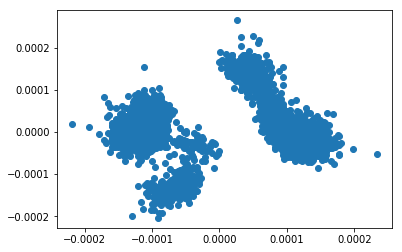

In [29]:
feature_space = SpikesPCA(spikes)

 <h1 align="center">"FeatureSpace_1_5.jpg"</h1> 

<h3>K-means Part let's first try k = 3 </h3>

(4892, 2)


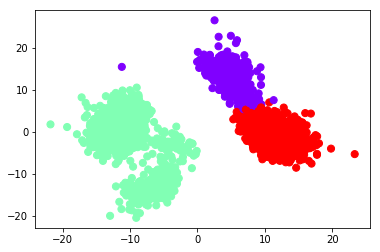

In [30]:

print(np.shape(feature_space))

draw_k_means(3,feature_space)

<h3> k = 2 </h3>

(4892, 2)


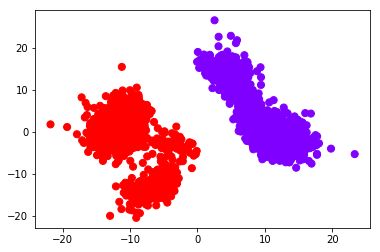

In [31]:
print(np.shape(feature_space))

draw_k_means(2,feature_space)

<h4>much better so we will asume K = 2 for electrode 1 , i.e 2 Neurons</h4>

 <h1 align="center">"Neurons_1_5.txt"</h1> 


<h3>Spikes on data part</h3>

In [32]:
Templates,labels = get_k_means(2,spikes)

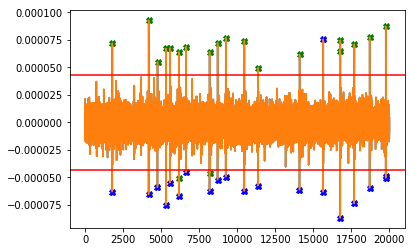

In [33]:
markPeaks(threshold,first_elec,labels,spikes_peaks)

 <h1 align="center">"DetectedSpikes_1_5.jpg"</h1> 

<h3>Template part</h3>

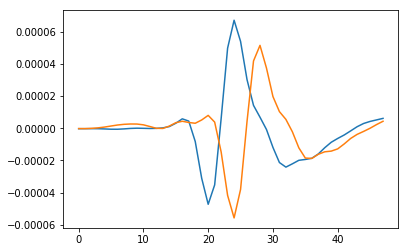

In [34]:
for i in Templates:
    plt.plot(i)
    
plt.show()

 <h1 align="center">"Templates_1_5.jpg"</h1> 

<h1>-----------End of Part 2/4-----------</h1>

<h3>The Following results is for electrode 2 and 3.5 * Standard Deviation Threshold</h3>

In [35]:

threshold = calcThreshold(second_elec,3.5)

spikes_peaks = getSpikesPeaks(second_elec_abs,threshold)

n_spikes = len(spikes_peaks)

print(n_spikes)

4895


<h3>Please wait this might take a couple of minutes :D </h3>

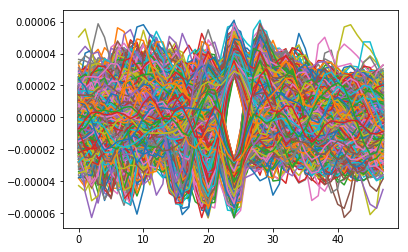

In [36]:
spikes = getSpikes(spikes_peaks,second_elec)

<h3>Now the PCA part</h3>

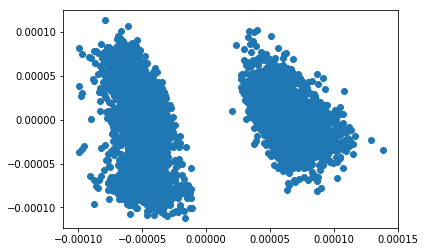

In [37]:
feature_space = SpikesPCA(spikes)

 <h1 align="center">"FeatureSpace_2_3_5.jpg"</h1> 

<h3>K-means Part let's first try k = 2 </h3>

(4894, 2)


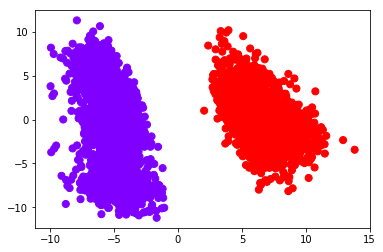

In [38]:

print(np.shape(feature_space))

draw_k_means(2,feature_space)

<h4>looks good so we will asume K = 2 for electrode 2 , i.e 2 Neurons</h4>

 <h1 align="center">"Neurons_2_3_5.txt"</h1> 


<h3>Spikes on data part</h3>

In [39]:
Templates,labels = get_k_means(2,spikes)

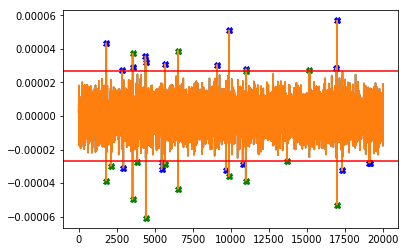

In [40]:
markPeaks(threshold,second_elec,labels,spikes_peaks)

 <h1 align="center">"DetectedSpikes_2_3_5.jpg"</h1> 

<h3>Template part</h3>

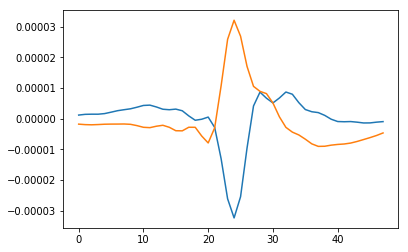

In [41]:
for i in Templates:
    plt.plot(i)
    
plt.show()

 <h1 align="center">"Templates_2_3_5.jpg"</h1> 

<h1>-----------End of Part 3/4-----------</h1>

<h3>The Following results is for electrode 2 and 5 * Standard Deviation Threshold</h3>

In [42]:

threshold = calcThreshold(second_elec,5)

spikes_peaks = getSpikesPeaks(second_elec_abs,threshold)

n_spikes = len(spikes_peaks)

print(n_spikes)

799


<h3>Please wait this might take a couple of minutes :D </h3>

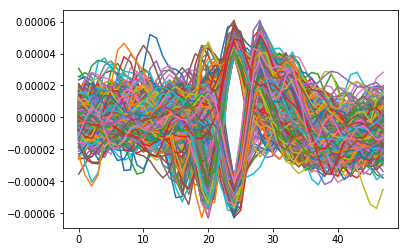

In [43]:
spikes = getSpikes(spikes_peaks,second_elec)

<h3>Now the PCA part</h3>

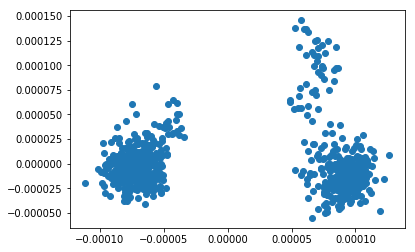

In [44]:
feature_space = SpikesPCA(spikes)

 <h1 align="center">"FeatureSpace_2_5.jpg"</h1> 

<h3>K-means Part let's first try k = 3 </h3>

(798, 2)


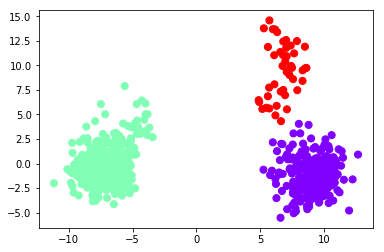

In [45]:

print(np.shape(feature_space))

draw_k_means(3,feature_space)

<h3> k = 2 </h3>

(798, 2)


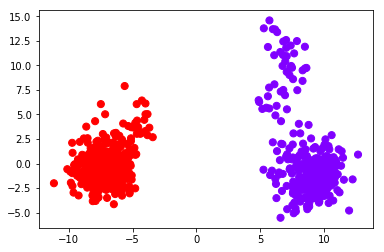

In [46]:
print(np.shape(feature_space))

draw_k_means(2,feature_space)

<h4>much better so we will asume K = 2 for electrode 2 , i.e 2 Neurons</h4>

 <h1 align="center">"Neurons_2_5.txt"</h1> 


<h3>Spikes on data part</h3>

In [47]:
Templates,labels = get_k_means(2,spikes)

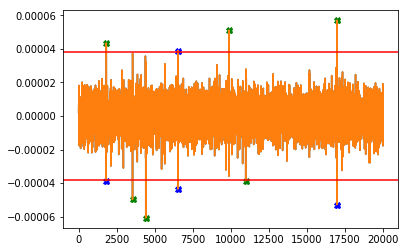

In [48]:
markPeaks(threshold,second_elec,labels,spikes_peaks)

 <h1 align="center">"DetectedSpikes_2_5.jpg"</h1> 

<h3>Template part</h3>

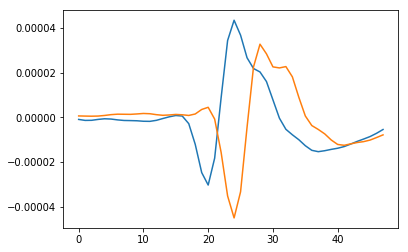

In [49]:
for i in Templates:
    plt.plot(i)
    
plt.show()

 <h1 align="center">"Templates_2_5.jpg"</h1> 

<h1>-----------End of Part 4/4-----------</h1>
